In [ ]:
!pip install lmdiag
!pip install pyyaml==5.4.1
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     - 17.8 MB 36.0 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Mount data từ Google Drive sang Colab
from google.colab import drive
drive.mount('/content/drive')

# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import lmdiag
import itertools
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas_profiling import ProfileReport

Mounted at /content/drive


<ipython-input-2-b643631db48c>:16: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Tìm hiểu về dữ liệu

Phần này sẽ bao gồm:
1. Đọc dữ liệu
2. Làm sạch và mô tả dữ liệu

## Đọc dữ liệu

In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/NhapMonKHDL/Real estate valuation data set.xlsx' # Đường dẫn tới file cần đọc
df = pd.read_excel(path)  # read_excel từ đường dẫn và trả về dưới dạng một DataFrame
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Làm sạch và mô tả dữ liệu

### Loại bỏ biến không sử dụng

Vì biến "No" có tác dụng như index của một quan trắc, không có ý nghĩa với biến phụ thuộc "Y house price of unit area" nên ta có thể loại bỏ.

In [ ]:
df.drop(['No'], axis = 1, inplace = True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### Mô tả dữ liệu

Kiểm tra nhanh dữ liệu

In [ ]:
def check_df(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(' TAIL '.center(70,'-'))
    print(dataframe.tail(head))
    print(' MISSING VALUES '.center(70,'-'))
    print(dataframe.isnull().sum())
    print(' DUPLICATED VALUES '.center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

------------------------------- SHAPE --------------------------------
Rows: 414
Columns: 7
------------------------------- TYPES --------------------------------
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object
-------------------------------- HEAD --------------------------------
   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0          2012.916667          32.0                                84.87882   
1          2012.916667          19.5                               306.59470   
2          2013.583333          13.3                               561.98450   
3          2013.500000          13.3                               561.98450   
4 

In [ ]:
# In ra các thống kê cơ bản của bộ dữ liệu
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Đổi tên biến

Vì tên các biến hiện tại dài và có khoảng cách, gây khó khăn cho các bước xử lý sau nên ta sẽ đổi lại tên cho các biến.

In [ ]:
df = df.rename(columns={'X1 transaction date': 'trans_date',
                        'X2 house age': 'age',
                        'X3 distance to the nearest MRT station': 'station_dist',
                        'X4 number of convenience stores': 'num_store',
                        'X5 latitude': 'latitude',
                        'X6 longitude': 'longtitude',
                        'Y house price of unit area': 'price'
                        })

### Xác định và loại bỏ các điểm ngoại lai

In [ ]:
model = smf.ols(formula='price~age+station_dist+num_store+latitude+longtitude', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           9.34e-73
Time:                        06:27:10   Log-Likelihood:                -1492.4
No. Observations:                 414   AIC:                             2997.
Df Residuals:                     408   BIC:                             3021.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4945.5951   6211.157     -0.796      0.426   -1.72e+04    7264.269
age             -0.2689      0.039     -6.896      0.000      -0.346      -0.192
station_dist    -0.0043      0.001     -5.888      0.000      -0.006      -0.003
num_store        1.1630      0.190      6.114      0.000       0.789       1.537
latitude       237.7672     44.948      5.290      0.000     149.409     326.126
longtitude      -7.8055     49.149     -0.159      0.874    -104.422      88.811
==============================================================================
Omnibus:                      240.068   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3748.747
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      17.114   Cond. No.                     2.35e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

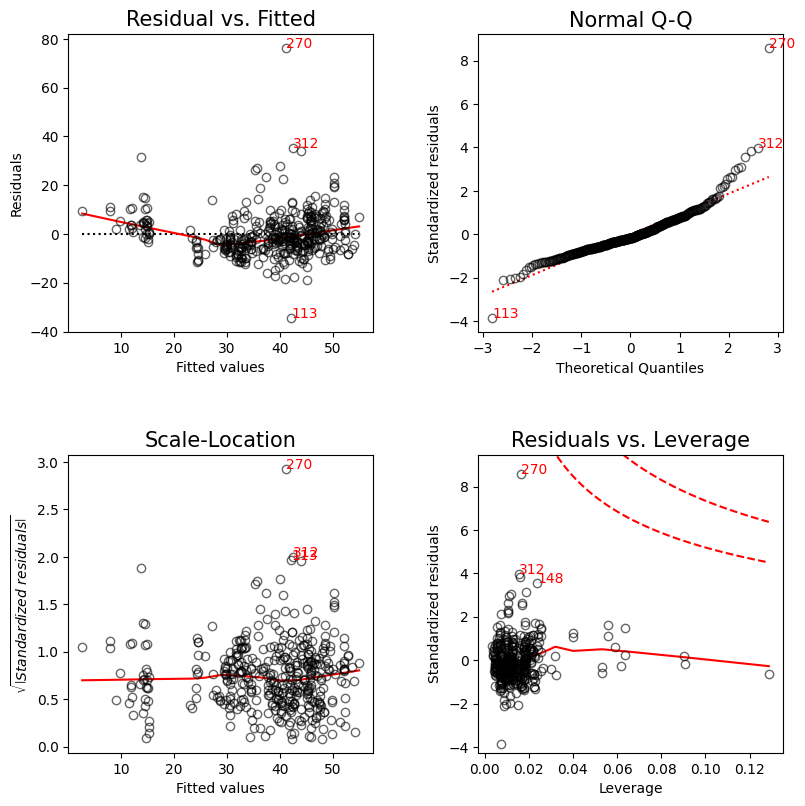

In [ ]:
plt.figure(figsize=(8,8))
lmdiag.plot(results);

Điểm 270 là điểm ngoại lại, nên bị loại bỏ để tránh ảnh hưởng tới kết quả cuối cùng của mô hình.

In [ ]:
df.drop(270, axis=0, inplace = True)

# Tiền xử lý dữ liệu

Đối với mô hình Linear Regression cơ bản, chuẩn hóa chỉ thay đổi khoảng giá trị của các trọng số nên các metrics đánh giá cuối cùng của mô hình không thay đổi.
=> Trong bài này em sẽ không chuẩn hóa.

Phần này sẽ bao gồm:
1. Chia bộ dữ liệu thành tập các biến dự đoán hay đặc trưng (X) và biến phụ thuộc hay mục tiêu (Y)

In [ ]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns = df.columns.tolist()
    columns.remove('price')
    X = df[columns] # Select features
    y = df['price'] # Select label
    return X, y

X, y = prepare_X_y(df)
print(X.shape)
print(y.shape)

(413, 6)
(413,)


# Lựa chọn đặc trưng

Phần này sẽ bao gồm:
1. Phân tích phân phối của các biến.
2. Phân tích tương quan giữa các biến đặc trưng (X) và biến mục tiêu (Y).

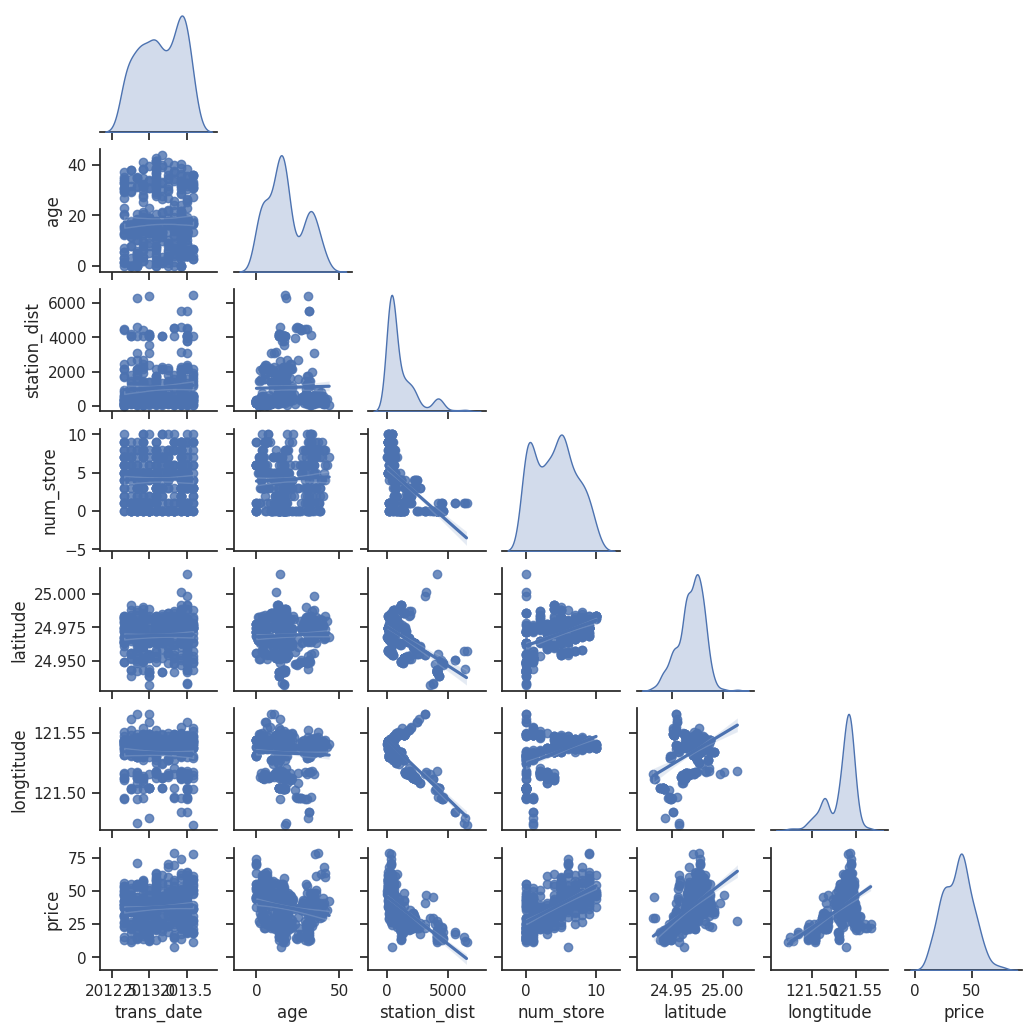

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df, kind='reg', diag_kind='kde', height=1.5, corner=True)
plt.show()

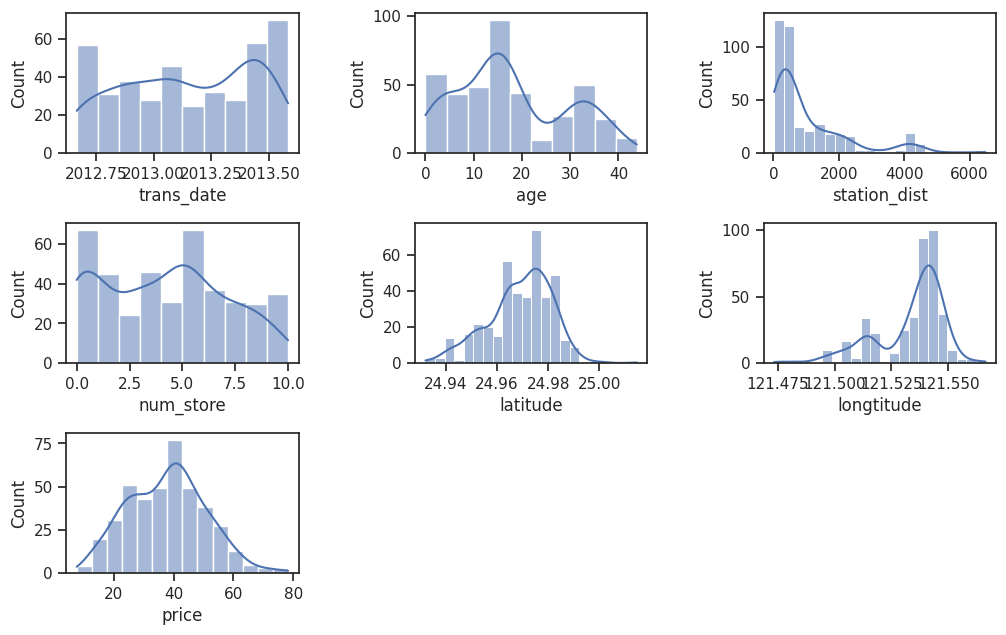

In [ ]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns, 1):
  plt.subplot(4, 3, i)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df[column], kde=True)
plt.show()

<Axes: >

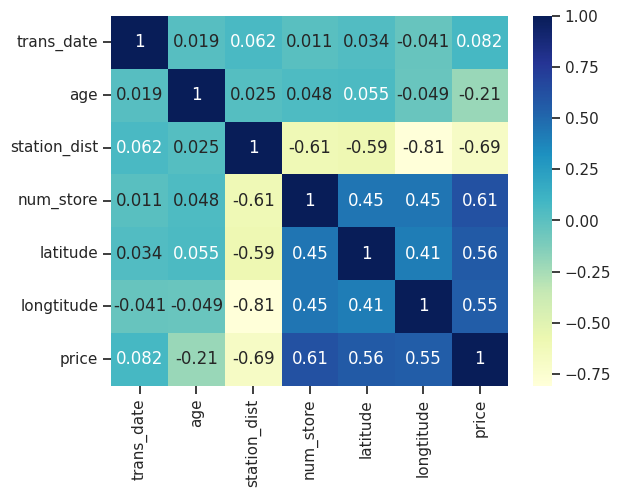

In [ ]:
# Vẽ heatmap thể hiện tương quan Pearson giữa các biến
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

**Nhận xét nhanh:**
*   Biến "station_dist" và "price" có khuynh hướng lệch phải, biến "longtitude" có khuynh hướng lệch trái.
*   Khoảng giá trị của các biến không giống nhau.
*   Biến phụ thuộc (price) tương quan nghịch mạnh với biến "station_dist". Điều này có vẻ hợp lý vì ngôi nhà càng gần các trạm metro (Khoảng cách với trạm càng nhỏ) thì di chuyển càng thuận lợi dẫn tới giá nhà sẽ cao hơn.
*   Giữa các biến "station_dist", "num_store",	"latitude" và "longitude" có mối tương quan (thuận hoặc nghịch) đáng quan tâm, đặc biệt là với biến "station_dist" có tương quan nghịch mạnh. Điều này dễ dẫn tới hiện tượng đa cộng tuyến khi xây dựng mô hình tuyến tính.
*   Biến "trans_date" gần như độc lập với biến phụ thuộc (price).


## Loại bỏ biến

Vì biến "trans_date" gần như độc lập với biến phụ thuộc (price) nên ta có thể xem xét loại bỏ mà không làm mất ý nghĩa thống kê.

In [ ]:
X.drop(['trans_date'], axis = 1, inplace = True)

<ipython-input-15-4ca66c172688>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['trans_date'], axis = 1, inplace = True)


# Huấn luyện mô hình

Phần này sẽ bao gồm:
1. Chia bộ dữ liệu thành tập Train và tập Test (80% cho Training, 20% cho Testing).
2. Tạo một mô hình Linear Regression.
3. Huấn luyện mô hình với dữ liệu Train.


## Chia tập Train-test

In [ ]:
def split_train_test(X, y, train_size=0.8):
    # Dùng hàm train_test_split để chia X và y thành 2 tập: train và test
    # Với train_size là tỉ lệ của tập train và cố định random_state để không bị thay đổi kết quả
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=0)
    print(f"Training set size: \tX_train: {X_train.shape} \tY_train: {y_train.shape}")
    print(f"Testing set size: \tX_test: {X_test.shape} \ty_train: {y_test.shape}")
    return X_train, X_test, y_train, y_test

In [ ]:
TRAIN_SIZE = 0.8 # Chọn tỉ lệ tập Train

X_train, X_test, y_train, y_test = split_train_test(X, y, train_size=TRAIN_SIZE)

Training set size: 	X_train: (330, 5) 	Y_train: (330,)
Testing set size: 	X_test: (83, 5) 	y_train: (83,)


## Khởi tạo mô hình Linear Regression

In [ ]:
def build_linear_model(X, y):
    # X, y nên lấy từ tập Train
    # Tách tên của các biến X, y để viết hàm hồi quy
    X_variable = list(X.columns.values)
    y_variable = y.name
    data = pd.concat([X, y], axis=1, join='inner')
    formula = y_variable + '~' +'+'.join(X_variable)
    # Dùng hàm Ordinary Least Squares regression (OLS) từ sklearn, input là hàm hồi quy (có bias) và dữ liệu của các biến (X, y)
    model = smf.ols(formula=formula, data=data)
    # Fit/Train model
    results = model.fit()
    return results

# Huấn luyện mô hình với tập Train
model = build_linear_model(X_train, y_train)

# Đánh giá mô hình

Phần này sẽ bao gồm:
1. Đánh giá mô hình đã được huấn luyện bằng Mean Squared Error (MSE).
2. Trực quan hóa giá nhà (price) thực tế so với giá nhà mô hình dự đoán.
3. Đánh giá và phân tích sâu hơn.

## Đánh giá bằng MSE

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_train = model.predict(X_train)
print("Train MSE: ", mean_squared_error(y_pred_train, y_train))
y_pred_test = model.predict(X_test)
print("Test MSE: ", mean_squared_error(y_pred_test, y_test))

Train MSE:  71.66253049205174
Test MSE:  39.14086025785771


## Trực quan hóa

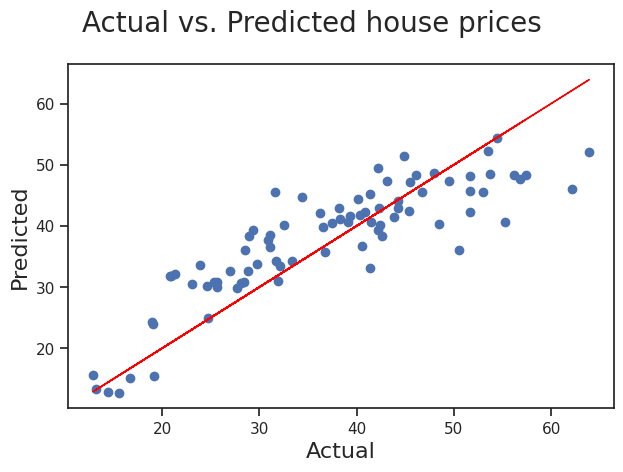

In [ ]:

plt.figure()
plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, label='line', color='red', linewidth=1)
plt.suptitle('Actual vs. Predicted house prices', fontsize=20)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét nhanh:**
*   Điểm MSE khá lớn cho thấy đường fitted của mô hình chưa được tốt.
*   Test MSE thấp hơn Train MSE có thể là do kích thước và phương sai của tập Test nhỏ hơn tập Train nhiều.
*   Nhìn vào biểu đồ trực quan hóa thì ta thấy đường fitted của mô hình dường như không bắt được xu hướng của các điểm dữ liệu.
*   Nhìn vào phân bố của các điểm dữ liệu, ta đoán có thể một hàm parabol sẽ phù hợp hơn với bộ dữ liệu này.



## Đánh giá và phân tích sâu hơn

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     93.49
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.04e-60
Time:                        06:27:38   Log-Likelihood:                -1173.1
No. Observations:                 330   AIC:                             2358.
Df Residuals:                     324   BIC:                             2381.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9154.2077   6703.314     -1.366      0.173   -2.23e+04    4033.308
age             -0.2468      0.042     -5.880      0.000      -0.329      -0.164
station_dist    -0.0035      0.001     -4.579      0.000      -0.005      -0.002
num_store        1.2980      0.205      6.339      0.000       0.895       1.701
latitude       236.2180     46.237      5.109      0.000     145.256     327.180
longtitude      27.1276     53.245      0.509      0.611     -77.623     131.878
==============================================================================
Omnibus:                       57.837   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.070
Skew:                           0.851   Prob(JB):                     3.84e-31
Kurtosis:                       5.700   Cond. No.                     2.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        feature           VIF
0           age  3.470633e+00
1  station_dist  2.984208e+00
2     num_store  4.771002e+00
3      latitude  5.904244e+06
4    longtitude  5.903920e+06


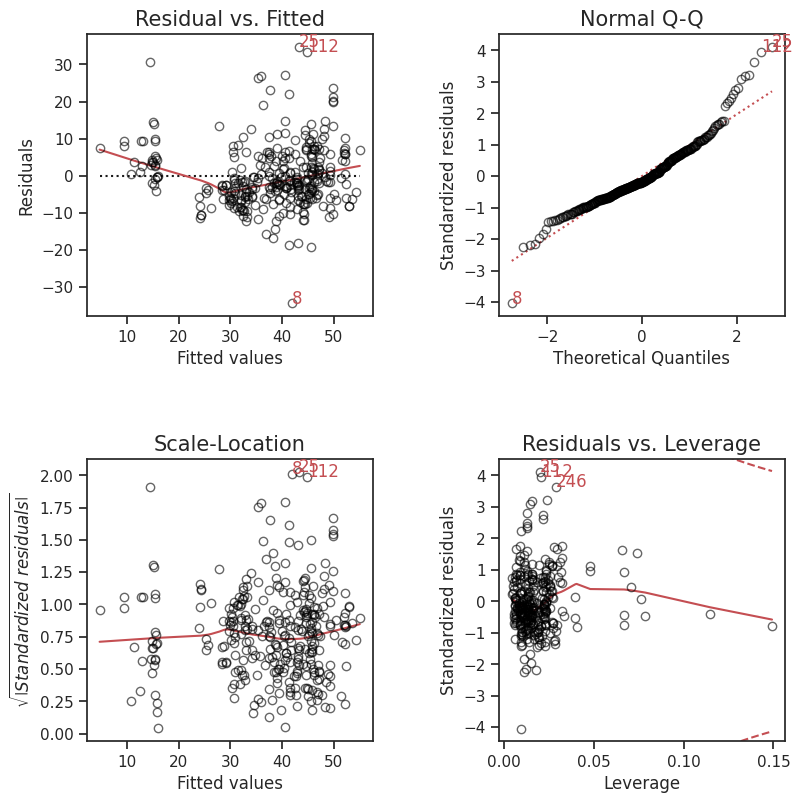

In [ ]:
plt.figure(figsize=(8, 8))
lmdiag.plot(model);

**Nhận xét:**
*   Điểm VIF của biến "latitude" và "longtitude" lớn hơn 5 rất nhiều cho thấy đã xảy ra đa cộng tuyến (hiện tượng phụ thuộc tuyến tính) giữa các biến dự đoán (X). Điều này vi phạm giả định các biến dự đoán phải độc lập tuyến tính với nhau.
*   Điểm p-value của biến "longtitude" lớn nghĩa là trong mô hình hiện tại, biến này không có ý nghĩa thống kê và có thể làm giảm Precision của mô hình.
*   Trên biểu đồ "Residual vs. Fitted" ta thấy các điểm bị co cụm và lệch qua phải (Trong khi phải phân tán đều, ngẫu nhiên trên dưới trục Residual = 0). Điều này cho thấy có thể tồn tại tương quan phi tuyến giữa các biến dự đoán (X) và biến phụ thuộc (Y hay giá nhà).
*   Trên biểu đồ "Normal Q-Q" ta thấy hầu hết các điểm đều nằm dọc trên 1 đường chéo. Điều này cho thấy các Residuals có phân phối chuẩn (Giả định phân phối chuẩn của phần dư (Residuals) không bị vi phạm).
*   Trên biểu đồ "Scale-Location" ta thấy đường màu đỏ gần như nằm ngang cho thấy phương sai của Residual (phần dư) gần như không thay đổi.

# Chỉnh sửa Mô hình

Do biến "price" bị lệch phải nhẹ và có khả năng tồn tại mối quan hệ phi tuyến đối với các biến độc lập, ta thêm vào biến biến đổi log(price).

In [ ]:
y_train_log = np.log(y_train)
y_train_log.name = 'log_price'

Vì mô hình em muốn hướng tới phải mang tính giải thích cao hơn tính dự đoán, ta lựa chọn các mô hình dựa theo tiêu chuẩn R^2 hiệu chỉnh cao nhất với VIF tối đa là 5.

Vì tổ hợp biến biến phải xét là bé (2^5 = 32), nên ta chọn tập hợp con tốt nhất thỏa tiêu chuẩn đã nêu trên.

In [ ]:
def standardize(x):
    y = x - x.mean()
    sd = x.std()
    return y / sd

In [ ]:
train_set = pd.concat([X_train, y_train_log], axis=1, join='inner')
train_set = train_set.apply(standardize, axis=0)
var_set = ['age','station_dist', 'num_store', 'latitude', 'longtitude']
best_rsquared_adj = -float('inf')
best_formula = ''
best_results = None
best_l_subset = None
for l in range(1,len(var_set)+1):
  for l_subset in itertools.combinations(var_set,l):
    formula = 'log_price~'+'+'.join(l_subset)
    model = smf.ols(formula=formula, data=train_set)
    results = model.fit()
    rsquared_adj = results.rsquared_adj
    variables = results.model.exog
    vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    if (rsquared_adj > best_rsquared_adj) and max(vif) <= 5:
      best_rsquared_adj = rsquared_adj
      best_formula = formula
      best_results = results
      best_l_subset = l_subset
      print(best_formula, rsquared_adj, max(vif))

log_price~age 0.031212320191068343 1.0
log_price~station_dist 0.5480138929551303 1.0000000000000004
log_price~age+station_dist 0.570699961651531 1.0016714575285726
log_price~station_dist+num_store 0.5812463551309766 1.5817763348227216
log_price~station_dist+latitude 0.5963163806269938 1.5100874856946456
log_price~age+station_dist+num_store 0.6099490903502764 1.595152769622696
log_price~age+station_dist+latitude 0.6254292902558338 1.5202531302677524
log_price~age+station_dist+num_store+latitude 0.6540788075479771 1.986115839359278


In [ ]:
model = smf.ols(formula='log_price~age+station_dist+num_store+latitude', data=train_set)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.79e-74
Time:                        06:39:42   Log-Likelihood:                -290.58
No. Observations:                 330   AIC:                             591.2
Df Residuals:                     325   BIC:                             610.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.083e-15      0.032  -2.19e-13      1.000      -0.064       0.064
age             -0.1882      0.033     -5.762      0.000      -0.253      -0.124
station_dist    -0.4481      0.046     -9.805      0.000      -0.538      -0.358
num_store        0.2185      0.041      5.291      0.000       0.137       0.300
latitude         0.2631      0.040      6.526      0.000       0.184       0.342
==============================================================================
Omnibus:                       91.702   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1104.074
Skew:                          -0.757   Prob(JB):                    1.79e-240
Kurtosis:                      11.832   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

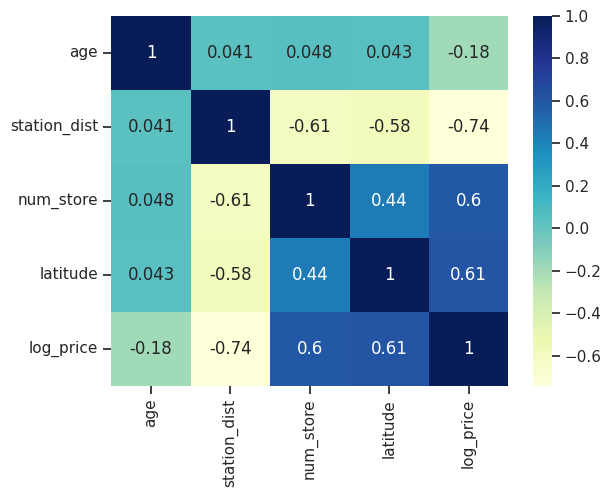

In [ ]:
sns.heatmap(train_set.drop(columns = ['longtitude']).corr(), annot = True, cmap="YlGnBu")

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = train_set.drop(columns = ['longtitude', 'log_price']).columns
vif_data["VIF"] = [variance_inflation_factor(train_set.drop(columns = ['longtitude', 'log_price']).values, i) for i in range(len(train_set.drop(columns = ['longtitude', 'log_price']).columns))]
print(vif_data)

        feature       VIF
0           age  1.015163
1  station_dist  1.986116
2     num_store  1.622034
3      latitude  1.545872


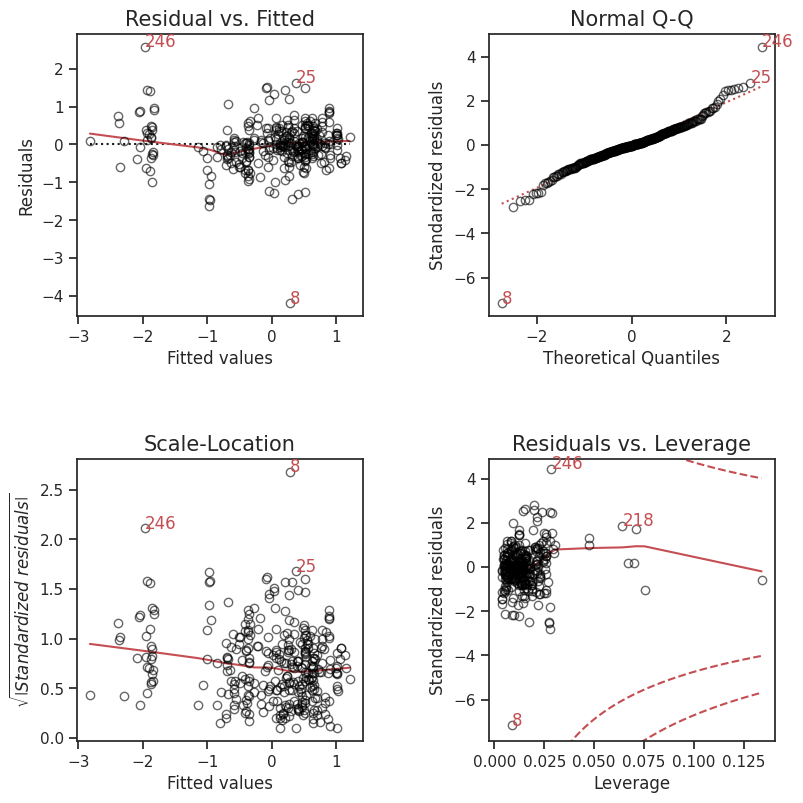

In [ ]:
plt.figure(figsize=(8, 8))
lmdiag.plot(results);

**Nhận xét:**
*   Điểm VIF các biến dự đoán đều bé hơn 5 cho thấy không xảy ra đa cộng tuyến (hiện tượng phụ thuộc tuyến tính) giữa các biến dự đoán (X).
*   Adjusted R-squared cho thấy với 2 biến "age" và "station_dist", mô hình giải thích được 57,1% ý nghĩa của giá nhà được dự đoán.
*   Không giải quyết được vi phạm về giả định tương quan tuyến tính giữa biến dự đoán và biến phụ thuộc.

# Kết luận

Phần này sẽ bao gồm:
1. Tổng hợp những thông tin từ việc đánh giá mô hình.
2. Những giới hạn, thiếu xót của mô hình.
3. Giải pháp tiềm năng cho bài toán.

*   Mô hình được chọn là log_price ~ age + station_dist.
*   Với mô hình tốt nhất ta huấn luyện được thì chỉ giải thích được 57,1% ý nghĩa của giá nhà được dự đoán.
*   Các biến dự đoán có tương quan với nhau khá lớn, dẫn tới rất dễ bị đa cộng tuyến.
*   Mô hình vi phạm giả định về tương quan tuyến tính giữa biến dự đoán và biến phụ thuộc.
*   Mô hình tuyến tính có vẻ không phù hợp với bài toán này.
*   Một mô hình phi tuyến như Polynomial Regression có thể sẽ là một mô hình tiềm năng hơn cho bài toán này.
